In [1]:
source = "all_reviewers_nips22.txt" # copy-pasted from https://neurips.cc/Conferences/2022/ProgramCommittee

with open(source, "r", encoding='utf-8') as f:
    all_reviewers = f.readlines()
    
len(all_reviewers)

9394

In [2]:
# remove reviewers with more than 2 spaces

filtered_reviewers = []

for r in all_reviewers:
    r = r.replace("\n", "")
    if r.count(" ") == 1:
        filtered_reviewers.append(r)

len(filtered_reviewers)

8863

In [3]:
first_names = []
last_names = []

for r in filtered_reviewers:
    tmp = r.split(" ")
    first, last = tmp[0], tmp[1]
    first_names.append(first)
    last_names.append(last)

In [4]:
unique_first_names = set(first_names)
unique_last_names = set(last_names)

In [5]:
first_occ = []
last_occ = []

for uf in unique_first_names:
    occ = 0
    for f in first_names:
        if f == uf:
            occ += 1
    first_occ.append([uf, occ])
    
    
for ul in unique_last_names:
    occ = 0
    for l in last_names:
        if l == ul:
            occ += 1
    last_occ.append([ul, occ])

In [6]:
import pandas as pd
df_first = pd.DataFrame(first_occ)
df_last = pd.DataFrame(last_occ)

In [7]:
df_first = df_first.rename({0: 'firstname', 1: 'occ'}, axis=1)
df_last = df_last.rename({0: 'lastname', 1: 'occ'}, axis=1)

In [8]:
df_first.sort_values(by=['occ'], ascending=False)

,firstname,occ
3293,Michael,45
2763,Alexander,40
1465,David,39
1499,Hao,38
2577,Wei,33
...,...,...
1989,Sijie,1
1990,Chunyu,1
1991,Chuhui,1
1993,Zhengping,1


In [9]:
df_last.sort_values(by=['occ'], ascending=False)

,lastname,occ
3124,Wang,358
582,Zhang,286
364,Li,269
1790,Liu,210
2399,Chen,210
...,...,...
1420,Monserrat-Aranda,1
1421,Eliasof,1
1422,Givchi,1
1423,Geist,1


In [10]:
top = 20 #how many to display?

top_first = df_first.sort_values(by=['occ'], ascending=False)[:top]
top_last = df_last.sort_values(by=['occ'], ascending=False)[:top]

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

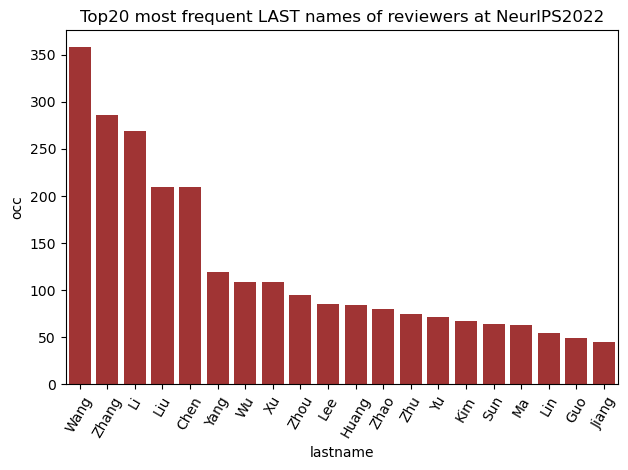

In [12]:
ax = sns.barplot(data=top_last, x='lastname', y='occ', color='firebrick')
ax.tick_params(axis='x', rotation=60)
ax.set_title('Top{} most frequent LAST names of reviewers at NeurIPS2022'.format(top))
plt.tight_layout()
plt.savefig("top{}-lastnames.png".format(top), dpi=300)

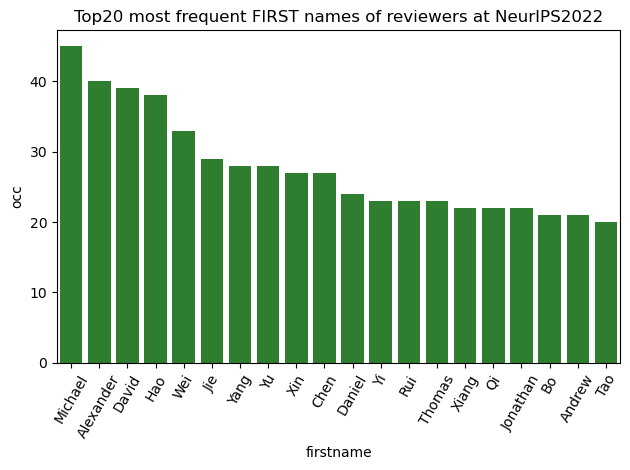

In [13]:
ax = sns.barplot(data=top_first, x='firstname', y='occ', color='forestgreen')
ax.tick_params(axis='x', rotation=60)
ax.set_title('Top{} most frequent FIRST names of reviewers at NeurIPS2022'.format(top))
plt.tight_layout()
plt.savefig("top{}-firstnames.png".format(top), dpi=300)